## Importing libraries

In [1]:
import pandas as pd
from ipywidgets import widgets, interactive, Layout

## Wanting to see information of the whole dataset

In [2]:
df = pd.read_csv('Python Project Data.csv')
df

,School,Conference,Final Ranking,Preseason Ranking,Recruiting Class Previous Year,OYPG,*DYPG,OPPG,*DPPG,Games played,2020-2021,*Team Defense does not include bowl games
0,Alabama,SEC,1.0,3.0,2.0,541.6,352.2,48.5,19.4,13,NaN,NaN
1,North Carolina,ACC,14.0,17.0,13.0,537.3,400.9,41.7,29.4,12,NaN,NaN
2,BYU,FBS Independent,NaN,NaN,NaN,522.2,318.0,43.5,15.3,12,NaN,NaN
3,Florida,SEC,7.0,7.0,9.0,509.8,428.0,39.8,30.8,12,NaN,NaN
4,Clemson,ACC,3.0,3.0,3.0,502.3,326.8,43.5,20.2,12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Colorado State,Mountain West,NaN,NaN,NaN,323.5,358.8,22.3,35.8,4,NaN,NaN
124,California,Pac 12,72.0,38.0,39.0,319.5,367.0,20.3,26.5,4,NaN,NaN
125,UMASS,FBS Independent,NaN,NaN,NaN,187.5,482.0,3.0,40.3,4,NaN,NaN
126,Miami (OH),MAC,NaN,NaN,NaN,365.3,393.0,28.7,26.7,3,NaN,NaN


In [3]:
df.columns

Index(['School', 'Conference', 'Final Ranking', 'Preseason Ranking',
       'Recruiting Class Previous Year', 'OYPG', '*DYPG', 'OPPG', '*DPPG',
       'Games played', '2020-2021',
       '*Team Defense does not include bowl games'],
      dtype='object')

In [4]:
df['Conference'].value_counts()

ACC                15
Big Ten            14
SEC                14
C-USA              13
Pac 12             12
Mountain West      12
MAC                12
American           11
Big 12             10
Sun Belt           10
FBS Independent     4
MVC                 1
Name: Conference, dtype: int64

## Getting important columns into one dataset

In [5]:
vital_df = df[['School','Conference','OYPG','OPPG', '*DYPG','*DPPG', 'Games played']]
vital_df

,School,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
0,Alabama,SEC,541.6,48.5,352.2,19.4,13
1,North Carolina,ACC,537.3,41.7,400.9,29.4,12
2,BYU,FBS Independent,522.2,43.5,318.0,15.3,12
3,Florida,SEC,509.8,39.8,428.0,30.8,12
4,Clemson,ACC,502.3,43.5,326.8,20.2,12
...,...,...,...,...,...,...,...
123,Colorado State,Mountain West,323.5,22.3,358.8,35.8,4
124,California,Pac 12,319.5,20.3,367.0,26.5,4
125,UMASS,FBS Independent,187.5,3.0,482.0,40.3,4
126,Miami (OH),MAC,365.3,28.7,393.0,26.7,3


## Setting index to the School column

In [6]:
vital_df.set_index('School', inplace=True)

In [7]:
vital_df

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Alabama,SEC,541.6,48.5,352.2,19.4,13
North Carolina,ACC,537.3,41.7,400.9,29.4,12
BYU,FBS Independent,522.2,43.5,318.0,15.3,12
Florida,SEC,509.8,39.8,428.0,30.8,12
Clemson,ACC,502.3,43.5,326.8,20.2,12
...,...,...,...,...,...,...
Colorado State,Mountain West,323.5,22.3,358.8,35.8,4
California,Pac 12,319.5,20.3,367.0,26.5,4
UMASS,FBS Independent,187.5,3.0,482.0,40.3,4


In [8]:
vital_df.corr()

,OYPG,OPPG,*DYPG,*DPPG,Games played
OYPG,1.000000,0.894717,-0.054526,-0.159340,0.237012
OPPG,0.894717,1.000000,-0.204043,-0.326024,0.232976
*DYPG,-0.054526,-0.204043,1.000000,0.866204,-0.128574
*DPPG,-0.159340,-0.326024,0.866204,1.000000,-0.187180
Games played,0.237012,0.232976,-0.128574,-0.187180,1.000000


## A simple function to get a teams attributes using loc

In [9]:
def get_team(team):
    return vital_df.loc[team][['Conference','OYPG','OPPG', '*DYPG','*DPPG', 'Games played']]

In [10]:
get_team('Iowa')

Conference      Big Ten
OYPG              368.6
OPPG               31.8
*DYPG             313.8
*DPPG                16
Games played          8
Name: Iowa, dtype: object

In [11]:
college_team = widgets.Dropdown(
    description = 'Team:',
    options = sorted(list(set(vital_df.index))),
    value = "Iowa",
    style = {"description_width": '50px'},
    layout = Layout(width="30%")
)

def view(team):
    
    vital_dftmp = vital_df.loc[team][['OYPG','*DYPG']]

    title = "YPG stats for {}".format(team)
    vital_dftmp[['OYPG','*DYPG']].plot(kind="bar", title=title, grid=True, figsize=(10,5))

i = interactive(view, team=college_team)
display(i)


interactive(children=(Dropdown(description='Team:', index=41, layout=Layout(width='30%'), options=('Air Force'…

In [12]:
college_team = widgets.Dropdown(
    description = 'Team:',
    options = sorted(list(set(vital_df.index))),  # a sorted list of unique teamIDs plus All
    value = "Iowa",
    style = {"description_width": '50px'},
    layout = Layout(width="30%")
)

def view(team):
    
    vital_dftmp = vital_df.loc[team][['OPPG','*DPPG']]

    title = "PPG stats for {}".format(team)
    vital_dftmp[['OPPG','*DPPG']].plot(kind="bar", title=title, grid=True, figsize=(10,5))

i = interactive(view, team=college_team)
display(i)


interactive(children=(Dropdown(description='Team:', index=41, layout=Layout(width='30%'), options=('Air Force'…

## Averages for each category sorted by Confernece

In [13]:
vital_df.groupby('Conference').mean()

,OYPG,OPPG,*DYPG,*DPPG,Games played
Conference,,,,,
ACC,417.646667,30.880000,411.373333,29.213333,10.866667
American,415.554545,30.081818,412.145455,30.290909,9.545455
Big 12,399.600000,30.060000,385.310000,28.390000,10.200000
Big Ten,383.728571,26.828571,389.178571,26.407143,7.500000
C-USA,363.676923,25.246154,386.700000,27.900000,8.846154
FBS Independent,377.550000,27.875000,348.250000,22.725000,9.750000
MAC,419.125000,32.091667,419.100000,31.566667,5.500000
MVC,299.300000,19.570000,286.000000,15.290000,7.000000
Mountain West,376.633333,25.558333,385.250000,26.941667,6.833333


## Comparing Stats between Conferences

<AxesSubplot:title={'center':'Yard averages by Conference'}, xlabel='Conference'>

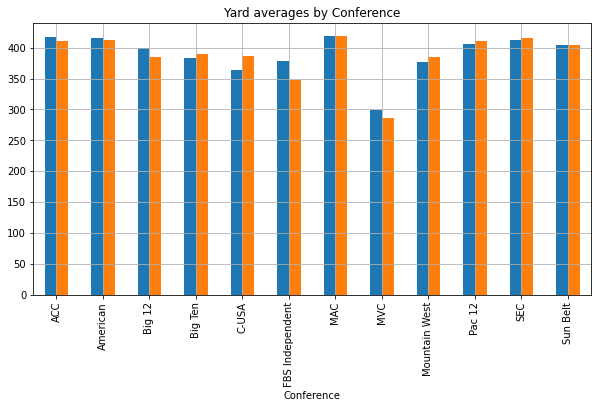

In [14]:
vital_dftmp1 = vital_df.groupby('Conference').mean()

title = "Yard averages by Conference"
vital_dftmp1[['OYPG','*DYPG']].plot(kind="bar",title=title, grid=True, figsize=(10,5), legend=False)


<AxesSubplot:title={'center':'Point averages by Conference'}, xlabel='Conference'>

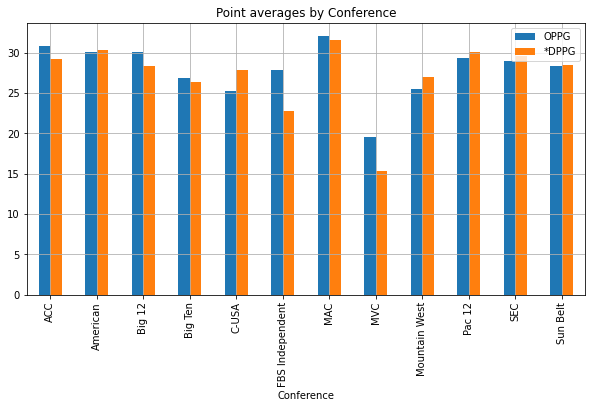

In [15]:
vital_dftmp2 = vital_df.groupby('Conference').mean()
title = "Point averages by Conference"
vital_dftmp2[['OPPG','*DPPG']].plot(kind="bar", title=title, grid=True, figsize=(10,5))

## Top 10 teams with the most games played

In [16]:
vital_df[:11]

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Alabama,SEC,541.6,48.5,352.2,19.4,13
North Carolina,ACC,537.3,41.7,400.9,29.4,12
BYU,FBS Independent,522.2,43.5,318.0,15.3,12
Florida,SEC,509.8,39.8,428.0,30.8,12
Clemson,ACC,502.3,43.5,326.8,20.2,12
Appalachian State,Sun Belt,452.0,33.8,328.8,20.0,12
Coastal Carolina,Sun Belt,449.8,37.2,351.9,20.3,12
Notre Dame,ACC,448.5,37.3,343.6,14.8,12
Iowa St,Big 12,436.3,32.9,341.6,21.4,12


## Teams with the least games played

In [17]:
vital_df[-11:]

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Bowling Green,MAC,326.4,11.4,475.8,45.0,5
Florida International,C-USA,280.8,22.4,422.8,32.4,5
Kent State,MAC,606.5,49.8,424.0,38.0,4
Arizona St,Pac 12,458.5,40.3,435.8,23.3,4
Washington,Pac 12,402.8,30.3,346.3,25.0,4
Washington St,Pac 12,384.0,27.0,461.8,38.5,4
Colorado State,Mountain West,323.5,22.3,358.8,35.8,4
California,Pac 12,319.5,20.3,367.0,26.5,4
UMASS,FBS Independent,187.5,3.0,482.0,40.3,4


## Top 10 teams in offensive yards per game

In [18]:
vital_df.sort_values(['OYPG'], ascending=False).head(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Kent State,MAC,606.5,49.8,424.0,38.0,4
UCF,American,568.1,42.2,491.8,33.2,10
Mississippi,SEC,555.5,39.2,519.0,38.3,10
Alabama,SEC,541.6,48.5,352.2,19.4,13
North Carolina,ACC,537.3,41.7,400.9,29.4,12
BYU,FBS Independent,522.2,43.5,318.0,15.3,12
Ohio St,Big Ten,519.4,41.0,401.9,25.8,8
North Texas,C-USA,513.2,34.4,522.1,42.8,10
Florida,SEC,509.8,39.8,428.0,30.8,12


In [19]:
vital_df.sort_values(['OYPG'], ascending=False).head(10)['Conference'].value_counts()

SEC                3
ACC                2
C-USA              1
Big Ten            1
American           1
MAC                1
FBS Independent    1
Name: Conference, dtype: int64

## Top 10 teams in points scored per game

In [20]:
vital_df.sort_values(['OPPG'], ascending=False).head(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Kent State,MAC,606.5,49.8,424.0,38.0,4
Alabama,SEC,541.6,48.5,352.2,19.4,13
BYU,FBS Independent,522.2,43.5,318.0,15.3,12
Clemson,ACC,502.3,43.5,326.8,20.2,12
Buffalo,MAC,478.1,43.4,359.0,21.9,7
Oklahoma,Big 12,494.7,43.0,350.8,21.7,11
Texas,Big 12,475.4,42.7,407.2,28.5,10
UCF,American,568.1,42.2,491.8,33.2,10
North Carolina,ACC,537.3,41.7,400.9,29.4,12


In [21]:
vital_df.sort_values(['OPPG'], ascending=False).head(10)['Conference'].value_counts()

MAC                3
ACC                2
Big 12             2
American           1
SEC                1
FBS Independent    1
Name: Conference, dtype: int64

## Bottom 10 teams in offensive yards per game

In [22]:
vital_df.sort_values(['OYPG'], ascending=False).tail(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
UL Monroe,Sun Belt,305.7,16.30,494.9,38.20,10
UNI,MVC,299.3,19.57,286.0,15.29,7
Western Kentucky,C-USA,290.3,19.00,348.6,25.30,12
Akron,MAC,281.2,17.20,459.8,41.30,6
Florida International,C-USA,280.8,22.40,422.8,32.40,5
Utah State,Mountain West,275.8,15.50,485.3,35.20,6
Navy,American,275.0,16.60,385.5,30.30,10
Syracuse,ACC,265.3,17.80,464.0,32.70,11
Kansas,Big 12,259.2,15.80,459.2,46.00,9


In [23]:
vital_df.sort_values(['OYPG'], ascending=False).tail(10)['Conference'].value_counts()

C-USA              2
ACC                1
Big 12             1
Sun Belt           1
MAC                1
Mountain West      1
American           1
MVC                1
FBS Independent    1
Name: Conference, dtype: int64

## Bottom 10 teams in points scored per game

In [24]:
vital_df.sort_values(['OPPG'], ascending=False).tail(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Arizona,Pac 12,369.4,17.4,473.0,39.8,5
UNLV,Mountain West,330.5,17.3,482.2,38.0,6
Akron,MAC,281.2,17.2,459.8,41.3,6
Navy,American,275.0,16.6,385.5,30.3,10
UL Monroe,Sun Belt,305.7,16.3,494.9,38.2,10
Kansas,Big 12,259.2,15.8,459.2,46.0,9
Utah State,Mountain West,275.8,15.5,485.3,35.2,6
Vanderbilt,SEC,328.8,14.8,487.9,37.3,9
Bowling Green,MAC,326.4,11.4,475.8,45.0,5


In [25]:
vital_df.sort_values(['OPPG'], ascending=False).tail(10)['Conference'].value_counts()

Mountain West      2
MAC                2
Sun Belt           1
Pac 12             1
Big 12             1
American           1
SEC                1
FBS Independent    1
Name: Conference, dtype: int64

## Top 10 teams in defensive yards per game

In [26]:
vital_df.sort_values(['*DYPG'], ascending=True).head(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Army,FBS Independent,317.8,26.80,275.3,14.80,12
Marshall,C-USA,391.2,28.50,279.4,13.00,10
San Diego State,Mountain West,350.8,24.60,283.5,17.80,8
UNI,MVC,299.3,19.57,286.0,15.29,7
West Virginia,Big 12,412.6,26.20,291.4,20.50,10
Wisconsin,Big Ten,345.6,25.10,299.9,17.40,7
Air Force,Mountain West,389.3,24.30,303.3,15.00,6
UAB,C-USA,401.3,28.40,311.1,21.40,9
Iowa,Big Ten,368.6,31.80,313.8,16.00,8


In [27]:
vital_df.sort_values(['*DYPG'], ascending=True).head(10)['Conference'].value_counts()

C-USA              2
Mountain West      2
Big Ten            2
Big 12             1
SEC                1
MVC                1
FBS Independent    1
Name: Conference, dtype: int64

## Top 10 teams in points allowed per game

In [28]:
vital_df.sort_values(['*DPPG'], ascending=True).head(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Marshall,C-USA,391.2,28.50,279.4,13.00,10
Notre Dame,ACC,448.5,37.30,343.6,14.80,12
Army,FBS Independent,317.8,26.80,275.3,14.80,12
Air Force,Mountain West,389.3,24.30,303.3,15.00,6
UNI,MVC,299.3,19.57,286.0,15.29,7
BYU,FBS Independent,522.2,43.50,318.0,15.30,12
Northwestern,Big Ten,360.9,24.70,341.2,15.90,9
Iowa,Big Ten,368.6,31.80,313.8,16.00,8
Ohio,MAC,362.7,34.30,389.0,16.70,3


In [29]:
vital_df.sort_values(['*DPPG'], ascending=True).head(10)['Conference'].value_counts()

Big Ten            2
FBS Independent    2
ACC                1
MAC                1
C-USA              1
Mountain West      1
American           1
MVC                1
Name: Conference, dtype: int64

## Bottom 10 teams in defensive yards per game

In [30]:
vital_df.sort_values(['*DYPG'], ascending=True).tail(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
UMASS,FBS Independent,187.5,3.0,482.0,40.3,4
UNLV,Mountain West,330.5,17.3,482.2,38.0,6
Utah State,Mountain West,275.8,15.5,485.3,35.2,6
Vanderbilt,SEC,328.8,14.8,487.9,37.3,9
Eastern Michigan,MAC,400.3,33.2,490.3,36.0,6
UCF,American,568.1,42.2,491.8,33.2,10
LSU,SEC,433.9,32.0,492.0,34.9,10
UL Monroe,Sun Belt,305.7,16.3,494.9,38.2,10
Mississippi,SEC,555.5,39.2,519.0,38.3,10


In [31]:
vital_df.sort_values(['*DYPG'], ascending=True).tail(10)['Conference'].value_counts()

SEC                3
Mountain West      2
C-USA              1
Sun Belt           1
American           1
MAC                1
FBS Independent    1
Name: Conference, dtype: int64

## Bottom 10 teams in points allowed per game

In [32]:
vital_df.sort_values(['*DPPG'], ascending=True).tail(10)

,Conference,OYPG,OPPG,*DYPG,*DPPG,Games played
School,,,,,,
Washington St,Pac 12,384.0,27.0,461.8,38.5,4
Northern Illinois,MAC,367.5,24.8,418.8,38.7,6
Arizona,Pac 12,369.4,17.4,473.0,39.8,5
South Florida,American,365.3,23.1,441.4,39.9,9
UMASS,FBS Independent,187.5,3.0,482.0,40.3,4
Akron,MAC,281.2,17.2,459.8,41.3,6
Arkansas State,Sun Belt,489.7,32.9,464.6,42.0,11
North Texas,C-USA,513.2,34.4,522.1,42.8,10
Bowling Green,MAC,326.4,11.4,475.8,45.0,5


In [33]:
vital_df.sort_values(['*DPPG'], ascending=True).tail(10)['Conference'].value_counts()

MAC                3
Pac 12             2
Sun Belt           1
C-USA              1
Big 12             1
American           1
FBS Independent    1
Name: Conference, dtype: int64

## Comparing Teams in Offensive Yards Per Game (OYPG)

In [34]:
def compare_teams_OYPG(x,y): 
    if vital_df.loc[x,'OYPG'] > vital_df.loc[y,'OYPG']:
        return "{} ({}) has a higher average in offensive yards per game than {} ({})".format(x,vital_df.loc[x,'OYPG'],y,vital_df.loc[y,'OYPG'])

    elif vital_df.loc[x,'OYPG'] < vital_df.loc[y,'OYPG']:
        return "{} ({}) has a higher average in offensive yards per game than {} ({})".format(y, vital_df.loc[y,'OYPG'], x, vital_df.loc[x,'OYPG'] )
    
    else:
        return "{} and {} have the same average in offensive yards per game ({})".format(x,y,vital_df.loc[x,'OYPG'])

In [35]:
compare_teams_OYPG('Iowa','UNI')

'Iowa (368.6) has a higher average in offensive yards per game than UNI (299.3)'

## Comparing Teams in Offensive Points Per Game (OPPG)

In [36]:
def compare_teams_OPPG(x,y): 
    if vital_df.loc[x,'OPPG'] > vital_df.loc[y,'OPPG']:
        return "{} ({}) has a higher average in points scored per game than {} ({})".format(x,vital_df.loc[x,'OPPG'],y,vital_df.loc[y,'OPPG'])

    elif vital_df.loc[x,'OPPG'] < vital_df.loc[y,'OPPG']:
        return "{} ({}) has a higher average in points scored per game than {} ({})".format(y, vital_df.loc[y,'OPPG'], x, vital_df.loc[x,'OPPG'] )
    
    else:
        return "{} and {} have the same average in points scored per game ({})".format(x,y,vital_df.loc[x,'OPPG'])

In [37]:
compare_teams_OPPG('UNI','Iowa')

'Iowa (31.8) has a higher average in points scored per game than UNI (19.57)'

## Comparing Teams in Defensive Yards Per Game (DYPG)

In [38]:
def compare_teams_DYPG(x,y): 
    if vital_df.loc[x,'*DYPG'] < vital_df.loc[y,'*DYPG']:
        return "{} ({}) has a better average in yards allowed per game than {} ({})".format(x,vital_df.loc[x,'*DYPG'],y,vital_df.loc[y,'*DYPG'])

    elif vital_df.loc[x,'*DYPG'] > vital_df.loc[y,'*DYPG']:
        return "{} ({}) has a better average in yards allowed per game than {} ({})".format(y, vital_df.loc[y,'*DYPG'], x, vital_df.loc[x,'*DYPG'] )
    
    else:
        return "{} and {} have the same average in yards allowed per game ({})".format(x,y,vital_df.loc[x,'*DYPG'])

In [39]:
compare_teams_DYPG('UNI','Iowa')

'UNI (286.0) has a better average in yards allowed per game than Iowa (313.8)'

## Comparing Teams in Defensive Points Per Game (DPPG)

In [40]:
def compare_teams_DPPG(x,y): 
    if vital_df.loc[x,'*DPPG'] < vital_df.loc[y,'*DPPG']:
        return "{} ({}) has a better average in points allowed per game than {} ({})".format(x,vital_df.loc[x,'*DPPG'],y,vital_df.loc[y,'*DPPG'])

    elif vital_df.loc[x,'*DPPG'] > vital_df.loc[y,'*DPPG']:
        return "{} ({}) has a better average in points allowed per game than {} ({})".format(y, vital_df.loc[y,'*DPPG'], x, vital_df.loc[x,'*DPPG'] )
    
    else:
        return "{} and {} have the same average in points allowed per game ({})".format(x,y,vital_df.loc[x,'*DPPG'])

In [41]:
compare_teams_DPPG('UNI','Iowa')

'UNI (15.29) has a better average in points allowed per game than Iowa (16.0)'